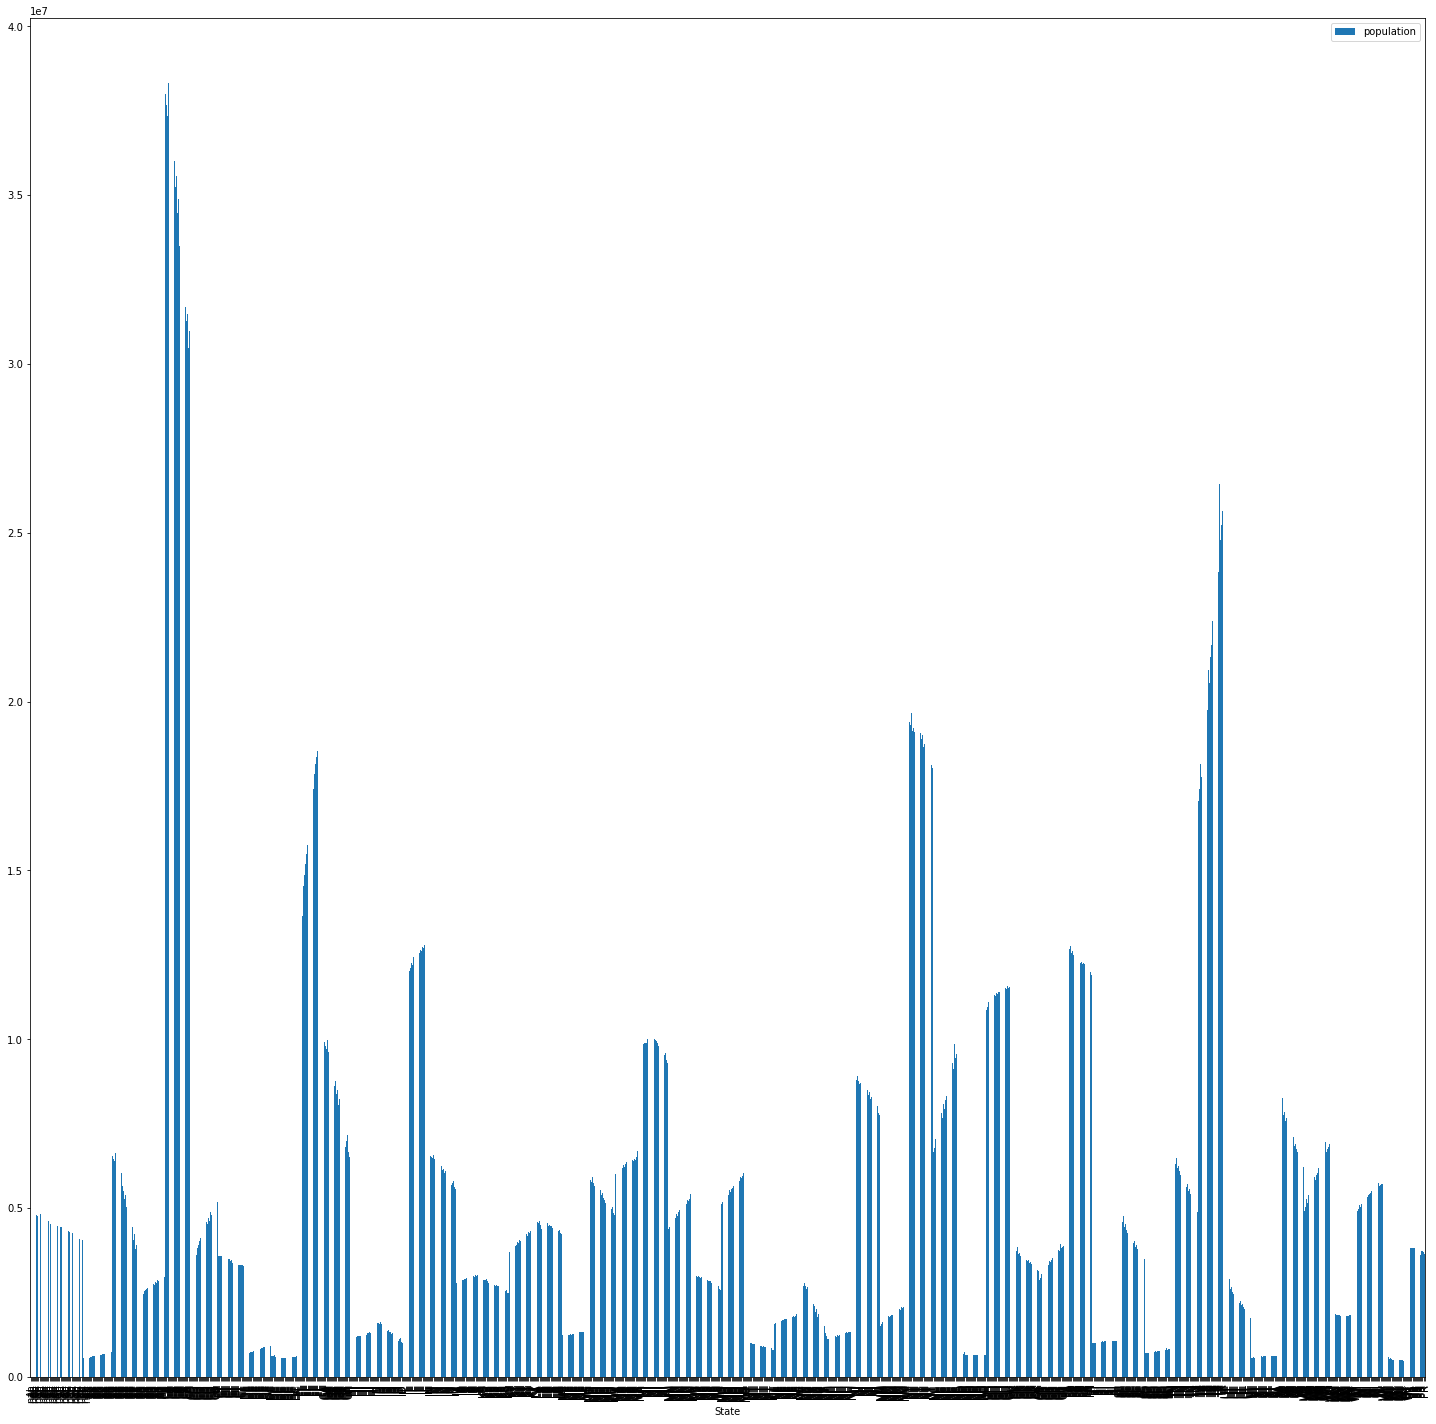

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

statePop = pd.read_csv("state-population.csv")
stateArea = pd.read_csv("state-areas.csv")
stateAbbrev = pd.read_csv("state-abbrevs.csv")

statePop.dropna(axis=0, inplace=True)
statePop = statePop[statePop.ages != "under18"]
statePop = statePop[statePop.State != "USA"]
statePop = statePop[statePop.year != "2010"]
statePop.replace(stateAbbrev["state"].tolist(), stateAbbrev["abbreviation"].tolist(), inplace=True)
stateArea.replace(stateAbbrev["state"].tolist(), stateAbbrev["abbreviation"].tolist(), inplace=True)
# statePop.loc[statePop['state/region'] == 'PR', 'state'] = 'Puerto Rico'

# mergeDF = statePop.merge(right=stateArea, how="outer", left_index=True, right_index=True)
mergeDF = statePop.join(other=stateArea, how="outer")
# mergeDF.groupby("year").mean()
# mergeDF = mergeDF[mergeDF.ages != "under18"]
# mergeDF2 = mergeDF.merge(right=stateAbbrev, how="outer", left_index=True, right_index=True)

# print(mergeDF2)
# print(mergeDF)
# print(statePop)
# print(stateArea)
# print(stateAbbrev)
mergeDF.plot.bar(x="State", y="population", figsize=(25,25))
# mergeDF.plot.hist(figsize=(10,10))
plt.show()